# Creating a scatter plot visualizing the relation between r_r200 and bpt presence.

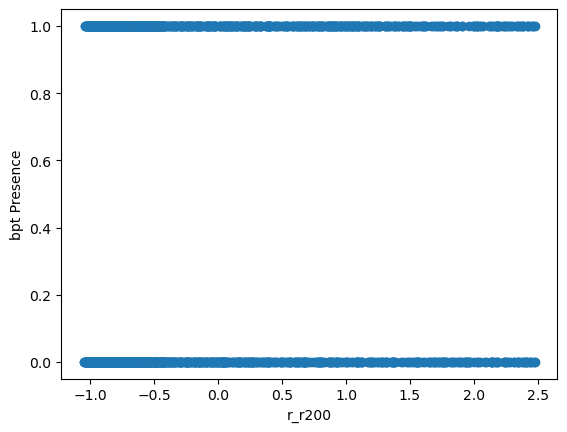

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Seyfert-1.csv')

plt.scatter(data['r_r200'], data['bpt'])
plt.xlabel('r_r200')
plt.ylabel('bpt Presence')
plt.show()

# Creating another scatter plot that includes the binned version of the data.

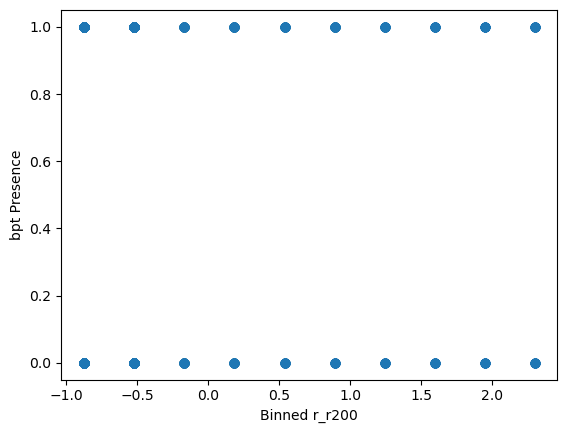

In [5]:
data['binned_r_r200'] = pd.cut(data['r_r200'], bins=10)

data['binned_r_r200_mean'] = data['binned_r_r200'].apply(lambda x: x.mid)

plt.scatter(data['binned_r_r200_mean'], data['bpt'])
plt.xlabel('Binned r_r200')
plt.ylabel('bpt Presence')
plt.show()


# Fitting data using a logistic regression model and estimating odds of bpt activity if r_r200 = 0.5.

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data[['r_r200']], data['bpt'])

odds = model.predict_proba([[0.5]])[0][1]
print(f'The estimated odds of bpt activity if r_r200 = 0.5 is {odds}')


The estimated odds of bpt activity if r_r200 = 0.5 is 0.5135349810326383


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Visualizing both original and binned data alongside the logistic regression solution.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


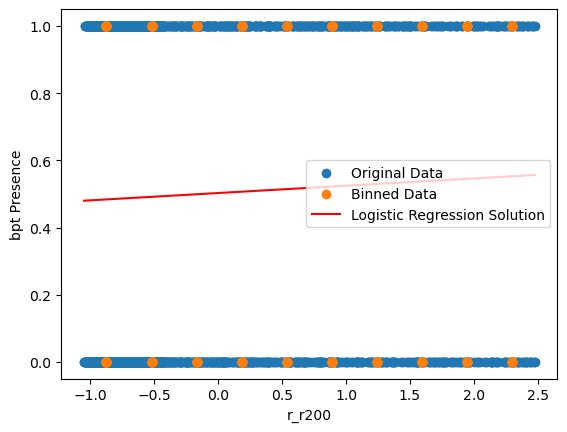

In [10]:
import numpy as np

x_values = np.linspace(data['r_r200'].min(), data['r_r200'].max(), 100)

y_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(data['r_r200'], data['bpt'], label='Original Data')
plt.scatter(data['binned_r_r200_mean'], data['bpt'], label='Binned Data')

plt.plot(x_values, y_values, color='red', label='Logistic Regression Solution')
plt.xlabel('r_r200')
plt.ylabel('bpt Presence')
plt.legend()
plt.show()


# Performing Bayesian Logistic Regression using Stan or PyMC3 and showing fitted logistic curve alongside credible intervals.

In [ ]:
import pymc3 as pm
with pm.Model() as model:
    beta0 = pm.Normal('beta0', mu=0, sd=10)
    beta1 = pm.Normal('beta1', mu=0, sd=10)

    p = pm.Deterministic('p', 1 / (1 + pm.math.exp(-(beta0 + beta1 * data['r_r200']))))

    y_obs = pm.Bernoulli('y_obs', p=p, observed=data['bpt'])

    trace = pm.sample(2000, tune=1000)

pm.plot_posterior_predictive_glm(trace, samples=100, eval=np.linspace(data['r_r200'].min(), data['r_r200'].max(), 100), label='Bayesian Logistic Regression')
plt.xlabel('r_r200')
plt.ylabel('bpt Presence')
plt.legend()
plt.show()
